### **Importing Libraries**
This cell imports all the necessary libraries for data analysis and visualization, including pandas, numpy, matplotlib, and seaborn. It also sets the matplotlib style to 'default'.

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')


### **Loading and Previewing the Dataset**
This cell loads the `netflix1.csv` file into a pandas DataFrame named `data` and then displays the first 5 rows of the DataFrame to give a quick overview of its structure and content.

In [92]:
data = pd.read_csv("netflix1.csv")
data.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


### **Exploring Dataset Information**
This cell provides a summary of the dataset. It prints the shape of the DataFrame, displays a concise summary of the DataFrame including data types and non-null values using `data.info()`, and generates descriptive statistics for numerical columns using `data.describe()`.

In [93]:
data.shape
data.info()
data.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### **Handling Duplicates and Missing Values**
This cell first removes any duplicate rows from the DataFrame to ensure data quality. Then, it calculates and displays the count of missing values for each column, confirming that there are no missing values after dropping duplicates.

In [94]:
data = data.drop_duplicates()
data.isnull().sum()


,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


### **Date Transformation and Content Type Count**
This cell converts the 'date_added' column to datetime objects and extracts 'year', 'month', and 'day' into new columns. It then counts and displays the occurrences of each 'type' (Movie or TV Show) in the dataset.

In [95]:
data['date_added'] = pd.to_datetime(data['date_added'])
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month
data['day'] = data['date_added'].dt.day

data['type'].value_counts()

,count
type,
Movie,6126
TV Show,2664


### **Visualizing Total Content Distribution by Type**
This cell generates a count plot to visualize the distribution of 'Movie' and 'TV Show' content on Netflix. The plot uses a red color scheme and includes a title.

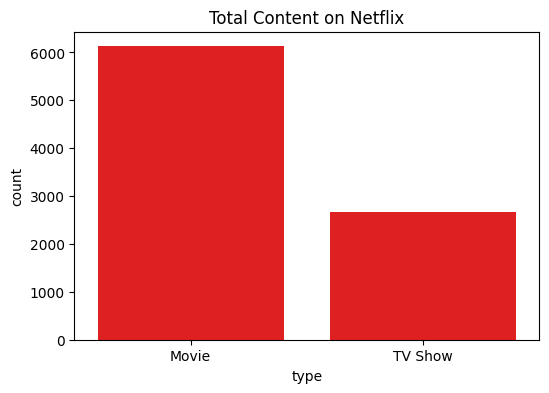

In [96]:
plt.figure(figsize=(6,4),)
sns.countplot(x='type', data=data , color='red')
plt.title("Total Content on Netflix")
plt.show()


### **Counting Content Ratings**
This cell calculates and displays the count of each unique value in the 'rating' column, providing a breakdown of how different content ratings are distributed across the Netflix library.

In [97]:
data['rating'].value_counts()


,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


### **Visualizing Rating Distribution**
This cell creates a bar plot to visualize the distribution of content ratings on Netflix. The plot displays the count of each rating category using a red color, along with appropriate labels and a title.

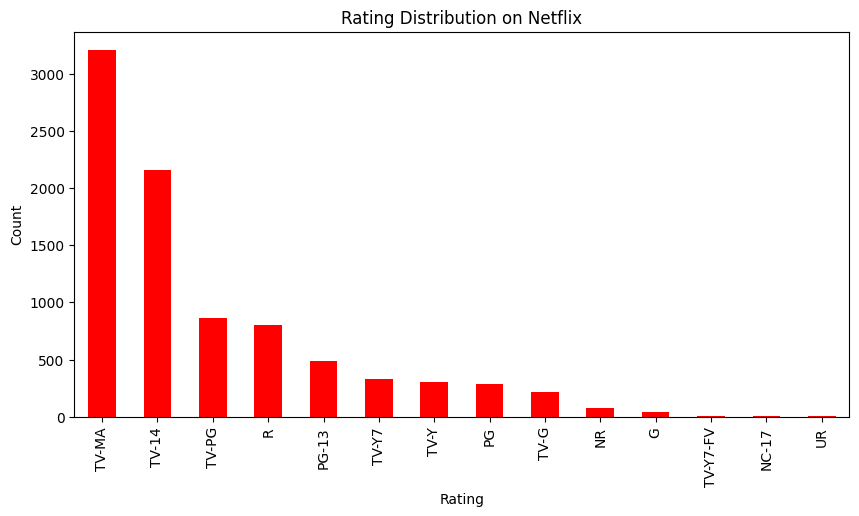

In [98]:
plt.figure(figsize=(10,5))
data['rating'].value_counts().plot(kind='bar', color='red')
plt.title("Rating Distribution on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


### **Top 10 Countries by Content Count**
This cell identifies and visualizes the top 10 countries with the most content on Netflix. A bar plot is generated in red, showing the content count for each country, with clear labels and a title.

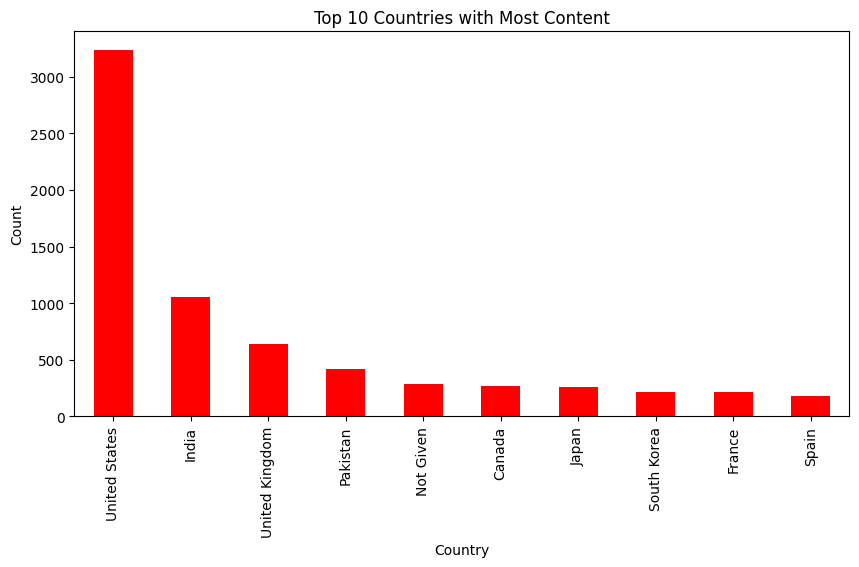

In [99]:
top_countries = data['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_countries.plot(kind='bar', color='red')
plt.title("Top 10 Countries with Most Content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


### **Monthly Release Trends for Movies and TV Shows**
This cell analyzes and visualizes the monthly release frequency for movies and TV shows separately. Two line plots are created on the same graph, showing the number of releases per month for each content type, with a legend, title, and axis labels.

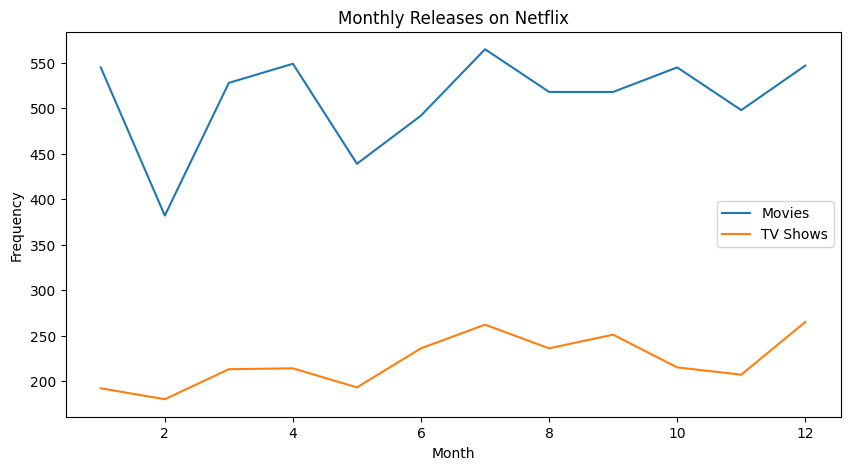

In [100]:
monthly_movie = data[data['type']=='Movie']['month'].value_counts().sort_index()
monthly_tv = data[data['type']=='TV Show']['month'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(monthly_movie, label='Movies')
plt.plot(monthly_tv, label='TV Shows')
plt.legend()
plt.title("Monthly Releases on Netflix")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.show()


### **Yearly Content Growth Trends**
This cell examines the yearly growth of movies and TV shows on Netflix. It generates two line plots on a single graph, depicting the count of releases per year for both content types, complete with a legend, title, and axis labels.

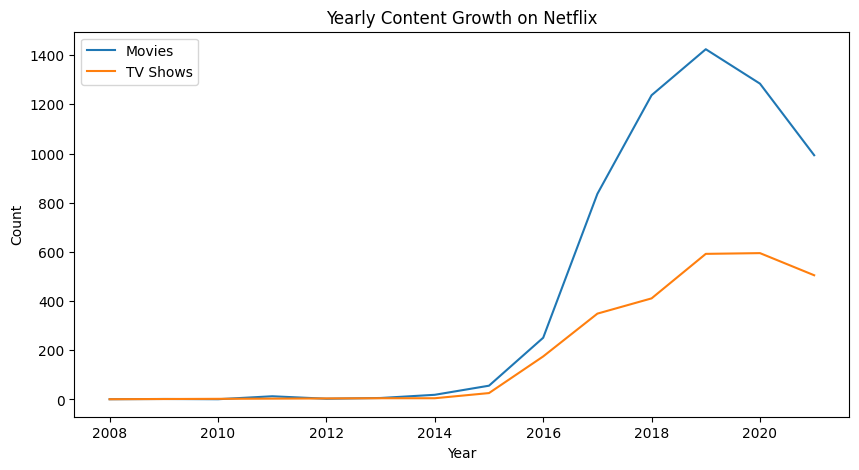

In [101]:
yearly_movie = data[data['type']=='Movie']['year'].value_counts().sort_index()
yearly_tv = data[data['type']=='TV Show']['year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(yearly_movie, label='Movies')
plt.plot(yearly_tv, label='TV Shows')
plt.legend()
plt.title("Yearly Content Growth on Netflix")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


### **Top 10 Movie Genres**
This cell identifies and visualizes the top 10 movie genres available on Netflix. A horizontal bar plot is generated in red, showing the count for each genre, with the y-axis inverted for better readability, and appropriate labels and a title.

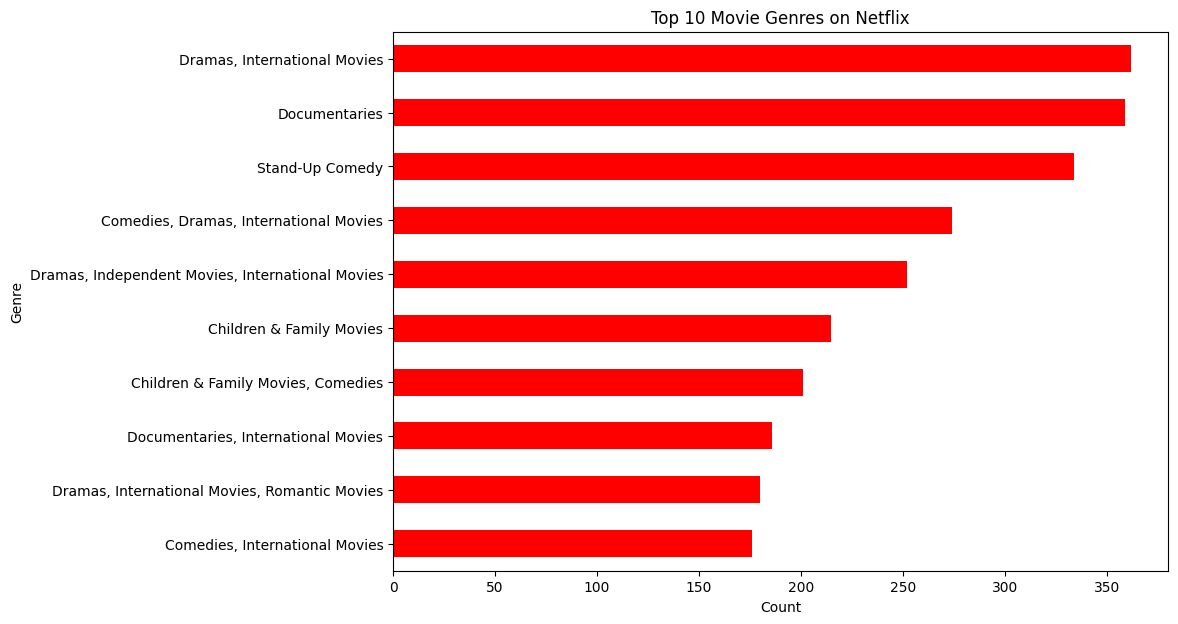

In [102]:
top_movie_genres = data[data['type']=='Movie']['listed_in'].value_counts().head(10)

plt.figure(figsize=(10,7))
top_movie_genres.plot(kind='barh', color='red')
plt.title("Top 10 Movie Genres on Netflix")
plt.ylabel("Genre")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.show()

### **Top 10 Directors**
This cell identifies and visualizes the top 10 directors with the most content on Netflix, excluding entries where the director is listed as 'Not Given'. A bar plot is created in red, displaying the content count for each director, along with clear labels and a title.

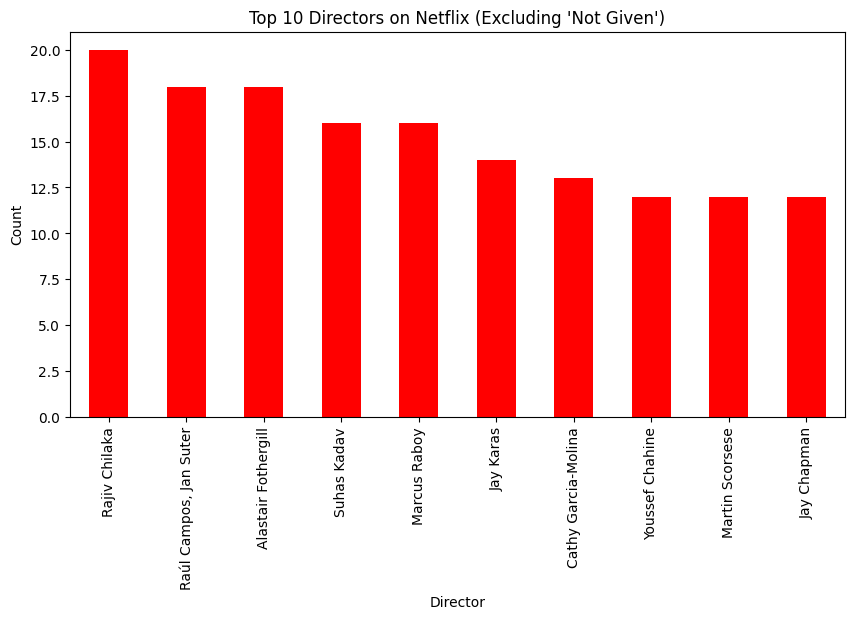

In [103]:
top_directors = data[data['director'] != 'Not Given']['director'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_directors.plot(kind='bar', color='red')
plt.title("Top 10 Directors on Netflix (Excluding 'Not Given')")
plt.xlabel("Director")
plt.ylabel("Count")
plt.show()